In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataframe 

df_index = pd.read_csv('economic_index.csv')

df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
#Drop unneccesary columns

df_index.drop(columns=["Unnamed: 0", "year","month"],axis=1, inplace=True)

In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

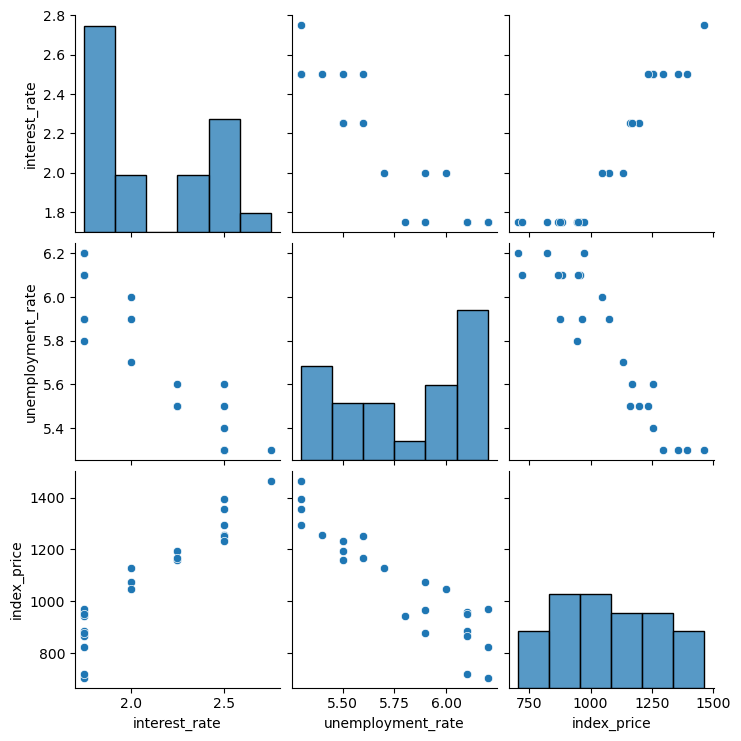

In [12]:
#Visualisation

sns.pairplot(df_index)

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

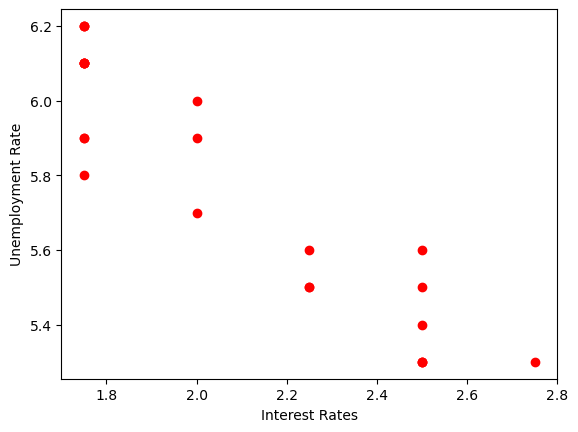

In [18]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rates")
plt.ylabel("Unemployment Rate")

In [26]:
#Independant and dependant features

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [27]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

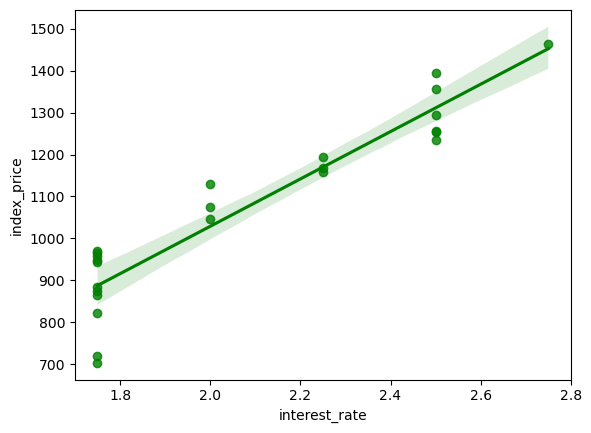

In [30]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'], data=df_index, color='g')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

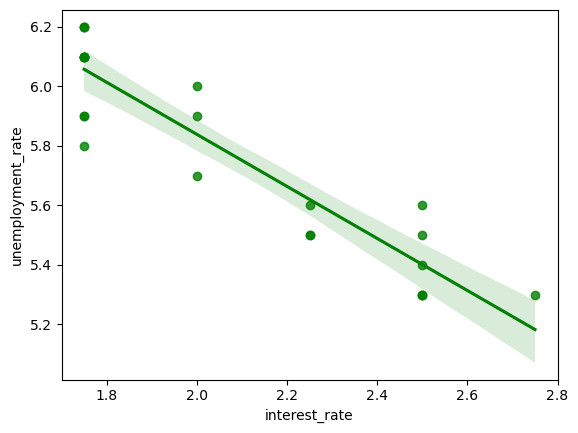

In [31]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'], data=df_index, color='g')

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [34]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [35]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train,scoring='neg_mean_squared_error', cv=5)

In [37]:
#Prediction

y_pred = regression.predict(X_test)

In [38]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [39]:
#Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


# Assumptions


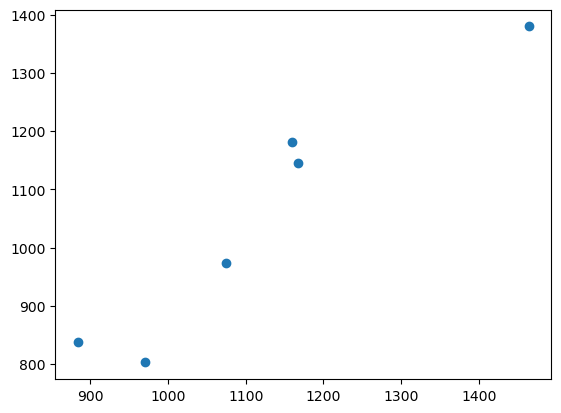

In [40]:
plt.scatter(y_test,y_pred)

In [41]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


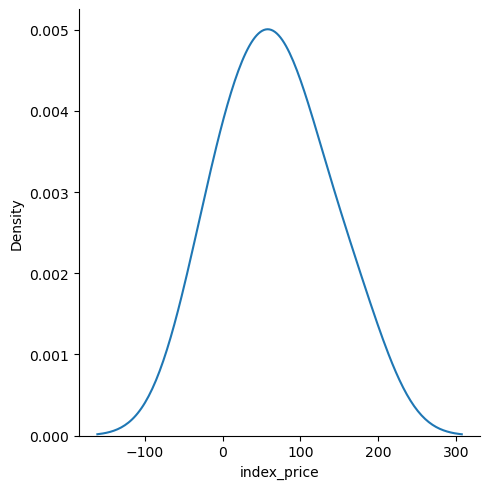

In [42]:
sns.displot(residuals,kind='kde')

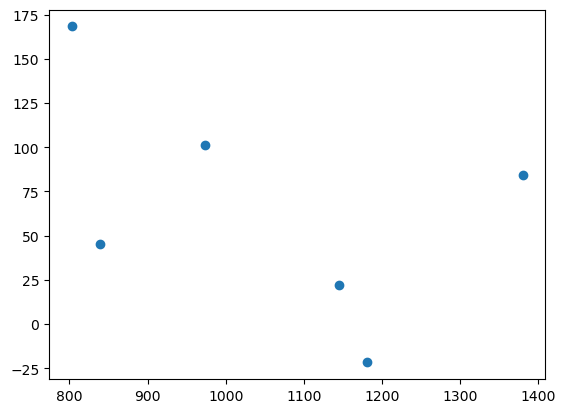

In [43]:
#Scatter Plot 

plt.scatter(y_pred,residuals)

In [ ]:
kjgh yjyj yj yjt tjtyj regw htyrjhyj yrtjytj d 